# Imports.

In [46]:
# Necessary libraries.
from numpy import intersect1d, nan, unique
import pandas as pd
from collections import Counter
from ast import literal_eval
from string import punctuation
import re
import os
from os.path import join, exists
import calendar
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
plt.rcParams.update({'font.size': 18})

from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [3]:
# Read File.
filepath = r'D:\ML_projects\IPV-Project\annotation\data\overall.xlsx'
df = pd.read_excel(filepath)
df.shape

(5930, 12)

In [4]:
df['tokens'] = df['tokens'].apply(literal_eval)
df['ac'] = df['ac'].apply(literal_eval)
df['ap'] = df['ap'].apply(literal_eval)
df.sample(5)

,id,source,annotator,text,tokens,ac,ap,conf,ipv,link,keyword,date
5773,3804,simulation_non_ipv,krn_common,हामि सहमत छौ कि त एक मुखर होस् भनेर ।,"[हामि, सहमत, छौ, कि, त, एक, मुखर, होस्, भनेर, ।]","[O, O, O, O, O, O, B-profanity, O, O, O]","[_, _, _, _, _, _, 0, _, _, _]",1,0,NaN,NaN,NaN
4888,2708,simulation_non_ipv,shr_common,तिमीले मेरो साथी रिमालाई चिन्छौ |,"[तिमीले, मेरो, साथी, रिमालाई, चिन्छौ, |]","[O, O, O, O, O, O]","[_, _, _, _, _, _]",1,0,NaN,NaN,NaN
3536,3297,simulation_non_ipv,krn,छोराको नाईके अच्या भ्राह्ट्चारी शेरेले कुरा बुझेछ |,"[छोराको, नाईके, अच्या, भ्राह्ट्चारी, शेरेले, कुरा, बुझेछ, |]","[O, O, O, B-profanity, O, O, O, O]","[_, _, _, 0, _, _, _, _]",1,0,NaN,NaN,NaN
1986,5301,twitter,shr,अहिलेको गठबन्धनका प्रमुख घटक-माके र काका मिल्नु नै थियो त त्यो बेलाको काटमार के को लागि थियो ? जवाफ दिने गेड़ा छ ? लाजशरम सबै पचाएका ईमान ईज्जत र नभएकाहरुको लागि आफ्नो अमुल्य भोट किन खसाल्ने ?,"[अहिलेको, गठबन्धनका, प्रमुख, घटक-माके, र, काका, मिल्नु, नै, थियो, त, त्यो, बेलाको, काटमार, के, को, लागि, थियो, ?, जवाफ, दिने, गेड़ा, छ, ?, लाजशरम, सबै, पचाएका, ईमान, ईज्जत, र, नभएकाहरुको, लागि, आफ्नो, अमुल्य, भोट, किन, खसाल्ने, ?]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[_, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _]",1,0,https://twitter.com/Sunil980210/status/1516949992564346880,इज्जत,2022-04-21 07:05:36
2508,5845,twitter,shr,"लेखेर राख्नु ! अरूको खुशी देख्न नसक्ने मान्छे , अरूलाई रुवाएर हाँस्ने मान्छे र अरूको घर भाँड्ने मान्छे कहिल्यै खुशी हुन सक्दैन ।","[लेखेर, राख्नु, !, अरूको, खुशी, देख्न, नसक्ने, मान्छे, ,, अरूलाई, रुवाएर, हाँस्ने, मान्छे, र, अरूको, घर, भाँड्ने, मान्छे, कहिल्यै, खुशी, हुन, सक्दैन, ।]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, B-profanity, I-profanity, I-profanity, I-profanity, O, O, O, O, O]","[_, _, _, _, _, _, _, _, _, _, _, _, _, _, 0, 0, 0, 0, _, _, _, _, _]",1,0,https://twitter.com/2lbraja/status/1463031109755621380,घर भाँड्ने,2021-11-23 12:11:13


In [5]:
df['ipv'].value_counts()

0    3408
1    2522
Name: ipv, dtype: int64

In [6]:
df_tweet = df[df['source'] == 'twitter']
df_tweet.shape

(1336, 12)

In [8]:
df_tweet['date'] = pd.to_datetime(df_tweet['date'])

## Read file.

In [48]:
df_tweet = pd.read_excel(r'D:\ML_projects\IPV-Scraper\results\all_keywords\scraped_all_keywords_15-05-022.xlsx')
df_tweet.shape

(5094, 4)

### Change to datetime type.

In [49]:
df_tweet['date'] = pd.to_datetime(df_tweet['date'])

## Number of tweets by year.

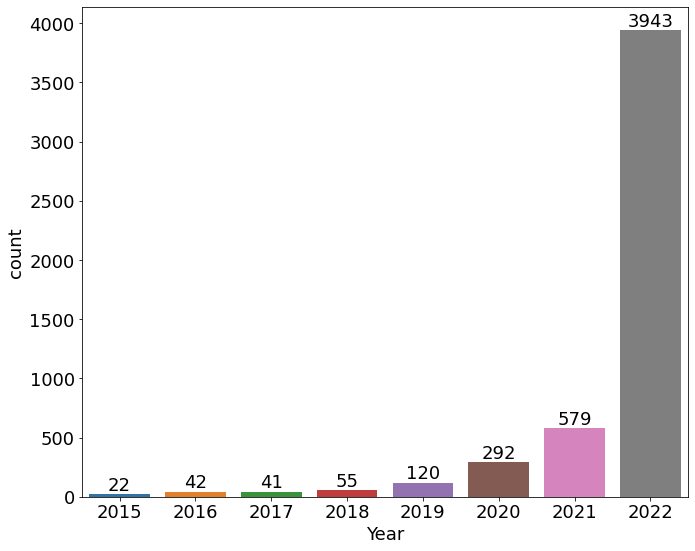

In [50]:
# Plot.
plt.figure(figsize = (10,8))
plot = sns.countplot(df_tweet.date.dt.year)
for container in plot.containers:
        plot.bar_label(container)
plt.xlabel('Year')
plt.tight_layout()
plt.show()

### Number of tweets by month.

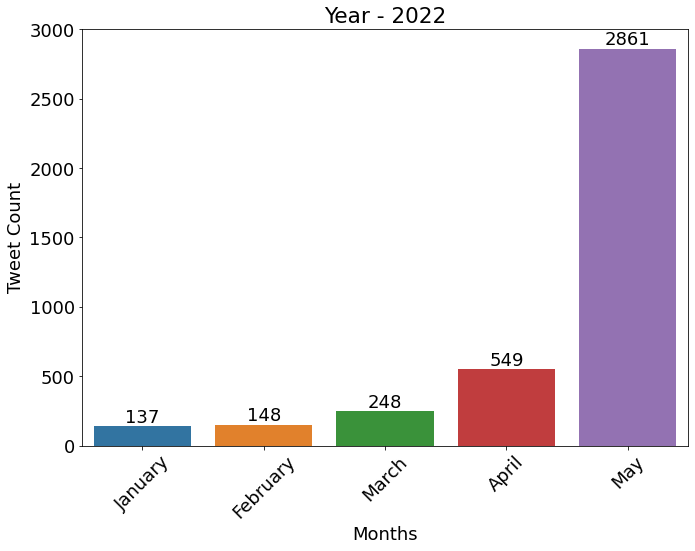

In [51]:
# All tweets in the year 2022.
in_2022 = df_tweet.loc[df_tweet.date.dt.year == 2022]

# Set plot.
plt.figure(figsize = (10,8))
plot = sns.countplot(in_2022.date.dt.month)
for container in plot.containers:
        plot.bar_label(container)

# Get month names.
months = [calendar.month_name[ii] for ii in range(1, 12+1)]     # All twelve month names.
months = months[:datetime.now().month]                          # Till current month (from January).

# Plot settings.
plot.set_xticklabels(months, rotation = 45)
plt.xlabel('Months')
plt.ylabel('Tweet Count')
plt.title('Year - 2022')
plt.tight_layout()
plt.show()

## Analyse Time series in 2022.

#### Analyse Time series Till April End.

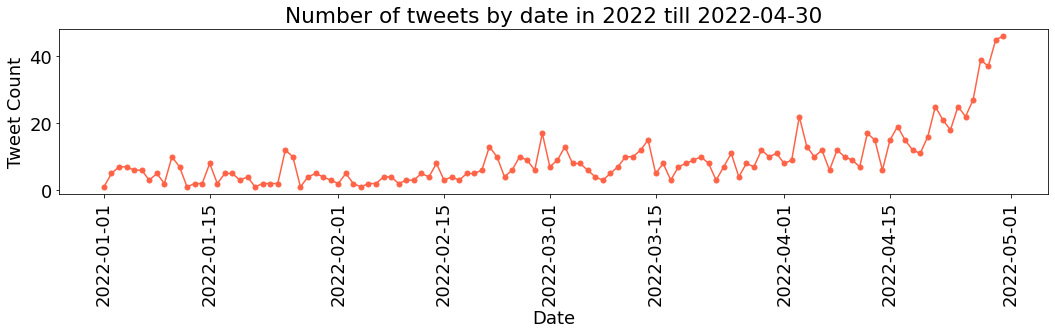

In [81]:
in_2022 = df_tweet.loc[df_tweet.date.dt.year == 2022]


# Group by counts.
in_2022 = in_2022.groupby(df_tweet.date.dt.date).count()['text']

# Till Apr end.
till_apr_end = in_2022[:120]

# Get the date of the most current tweet.
max_date = '2022-04-30'

# Plot.
plt.figure(figsize = (10,8))
plot = till_apr_end.plot(figsize = (15, 5), marker = ".", color = 'tomato', markersize = 10)   # Only till April End.

# Plot settings.
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title(f'Number of tweets by date in 2022 till {max_date}')
plt.tight_layout()
plt.show()

In [68]:
# Save data.
till_apr_end.to_csv('num_tweets_022_till_apr_end.tsv', sep = '\t', encoding = 'utf-8')

#### Analyse Time series in May 2022.

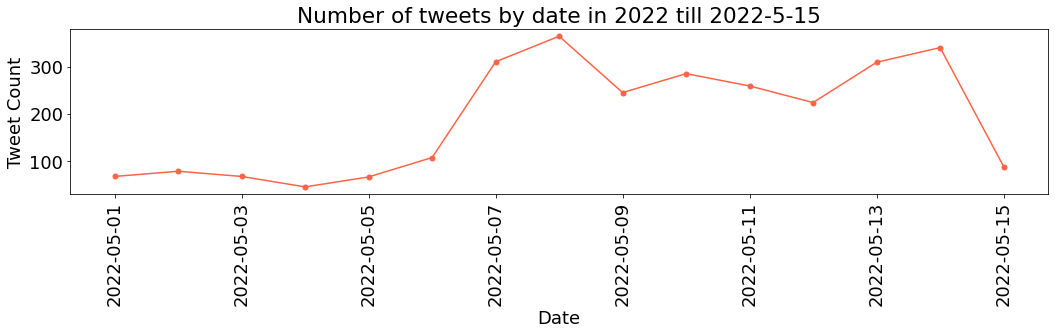

In [77]:
in_2022 = df_tweet.loc[df_tweet.date.dt.year == 2022]

# Get the date of the most current tweet.
max_date = in_2022['date'].max().date()
max_date = f'{max_date.year}-{max_date.month}-{max_date.day}'    # String form.

# Group by counts.
in_2022 = in_2022.groupby(df_tweet.date.dt.date).count()['text']

# Till Apr end.
from_may_start = in_2022[120:]

# Plot.
plt.figure(figsize = (10,8))
plot = from_may_start.plot(figsize = (15, 5), marker = ".", color = 'tomato', markersize = 10)   # Only till April End.

# Plot settings.
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title(f'Number of tweets by date in May 2022; till {max_date}')
plt.tight_layout()
plt.show()

In [72]:
# Save data.
from_may_start.to_csv('num_tweets_022_from_may_start.tsv', sep = '\t', encoding = 'utf-8')